In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data=load_diabetes()
# data

In [29]:
# Apply linear regression on data
X=data.data
y=data.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train,y_train)

print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [30]:
y_pred=L.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953252


# Ridge regression

In [31]:
# Apply ridge regression on data using sklearn

from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [32]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [33]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [34]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


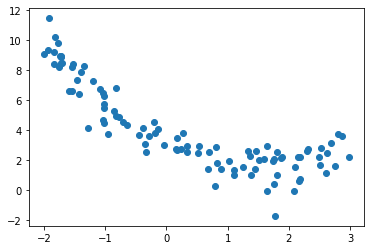

In [35]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

This function that will apply ridge regression on 3 different values of alpha and compare results

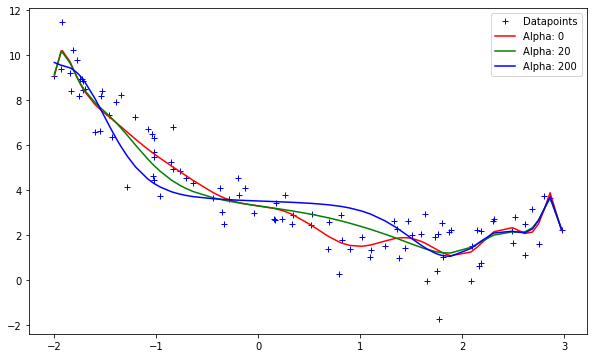

In [37]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

* alpha=0 means model overfits
* alpha=20 optimal value
* alpha=200 model underfits

In [36]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

## linear data

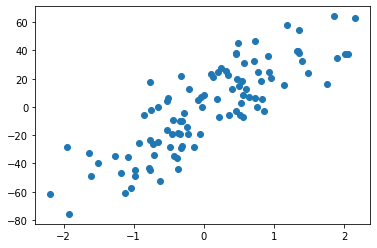

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


## Apply ridge regression on linear data

In [7]:
# Using Ridge class of sklearn
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523573


In [8]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


Graph on different values of alpha and how it affects the model fitting data.
* low alpha overfits, high alpha overfits
* need to select optimal value of alpha

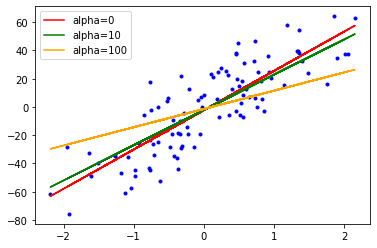

In [9]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [11]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b

In [12]:
# make a class for ridge regression for linear data

class RidgeReg:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [13]:
reg = RidgeReg(alpha=100)

In [14]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


# n dimensional data

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np
X,y = load_diabetes(return_X_y=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

Use Ridge class of sk learn to train data

In [18]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [19]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.46931288533098037

In [20]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [21]:
# making own class for ridge regression for n dimensional data
class RidgeReg:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [23]:
reg = RidgeReg()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808
